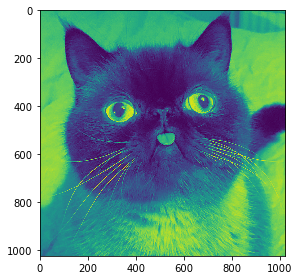

In [163]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
image = skimage.img_as_ubyte(skimage.color.rgb2gray(skimage.io.imread('Images/cat1000.jpg')))
plt.imshow(image)
plt.tight_layout()

In [164]:
def opening(image, kernel):
    return morphology.dilation(morphology.erosion(image, kernel), kernel)
def closing(image, kernel):
    return morphology.erosion(morphology.dilation(image, kernel), kernel)
def top_hat_transform(image, kernel):
    return image - opening(image, kernel)
def morphological_gradient(image, kernel):
    return morphology.dilation(image, kernel) - morphology.erosion(image, kernel)

In [165]:
kernels = [
    np.array([
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [0, 1, 1, 0],
        [0, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0]
    ]),
    np.ones((10, 10)),
    np.ones((15, 15))
]

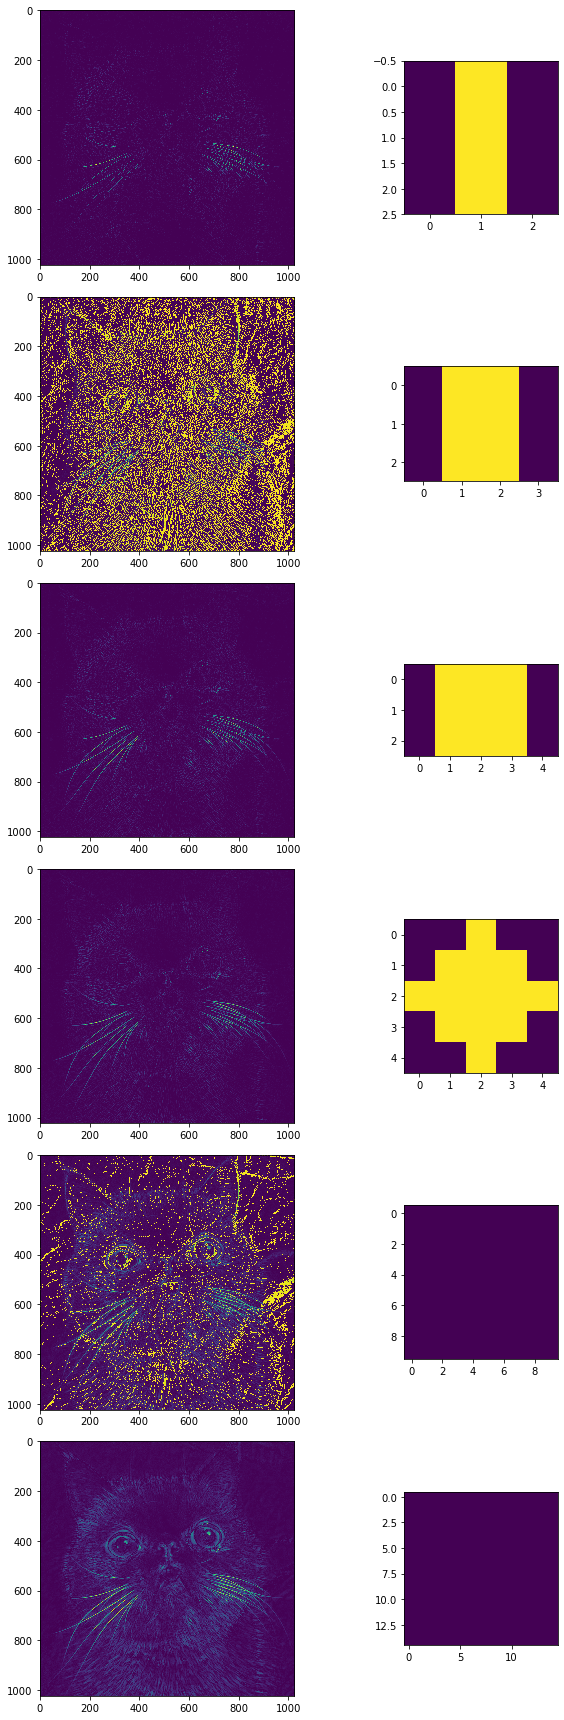

In [166]:
fig, axes = plt.subplots(nrows=len(kernels), ncols=2, figsize=(10, 4 * len(kernels)),
                         gridspec_kw={'width_ratios': [4, 1]})
for i, kernel in enumerate(kernels):
    axes[i][0].imshow(top_hat_transform(image, kernel))
    axes[i][1].imshow(kernel)
plt.tight_layout()

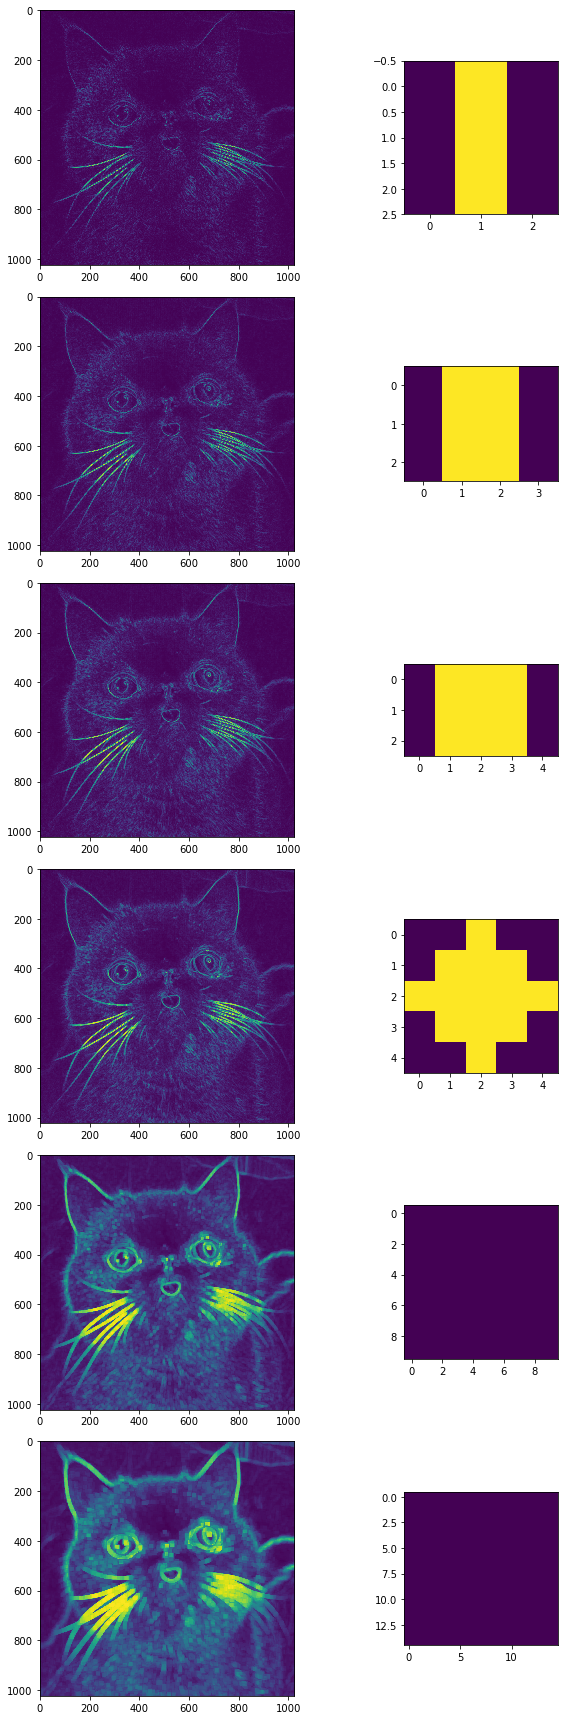

In [167]:
fig, axes = plt.subplots(nrows=len(kernels), ncols=2, figsize=(10, 4 * len(kernels)),
                         gridspec_kw={'width_ratios': [4, 1]})
for i, kernel in enumerate(kernels):
    axes[i][0].imshow(morphological_gradient(image, kernel))
    axes[i][1].imshow(kernel)
plt.tight_layout()